In [147]:
# aivietnam.ai - advertising
import numpy as np
# from numpy import genfromtxt
import matplotlib.pyplot as plt
import random
random.seed(0) # please do not remove this line
%matplotlib inline

def load_data_from_file(fileName = "advertising.csv"):
  data = np.genfromtxt(fileName, dtype=None, delimiter=',', skip_header=1)
  features_X = data[:, :3]
  sales_Y = data[:, 3]
  features_X = np.c_[np.ones((features_X.shape[0], 1)), features_X]

  return features_X, sales_Y

In [148]:
#Question 2
features_X, _ = load_data_from_file()
print(features_X[:5,:])
data_len, features_number  = features_X.shape #(row and column of features_X)
print(f'x number: {data_len}')
print(f'features number: {features_number}')

[[  1.  230.1  37.8  69.2]
 [  1.   44.5  39.3  45.1]
 [  1.   17.2  45.9  69.3]
 [  1.  151.5  41.3  58.5]
 [  1.  180.8  10.8  58.4]]
x number: 200
features number: 4


In [149]:
#Question 3
_, sales_Y = load_data_from_file()
print(sales_Y.shape)

(200,)


In [150]:
def generate_random_value(bound = 10):
    return (random.random() - 0.5)*bound

def create_individual(n=4, bound=10):
    individual = [generate_random_value(bound) for _ in range(n)]
    return individual

In [151]:
individual = create_individual()
print(individual)

[3.444218515250481, 2.5795440294030247, -0.79428419169155, -2.4108324970703663]


In [152]:
def compute_loss(individual):
    theta = np.array(individual)
    y_hat = features_X.dot(theta)
    loss  = np.multiply((y_hat-sales_Y), (y_hat-sales_Y)).mean()
    return loss

def compute_fitness(individual):
    loss = compute_loss(individual)
    fitness = 1/(loss+0.0001)
    return fitness

In [153]:
#question 4
features_X, sales_Y = load_data_from_file()
individual = [4.09, 4.82, 3.10, 4.02]
fitness_score = compute_fitness(individual)
print(fitness_score)

1.0186001911504377e-06


In [154]:
def crossover(individual1, individual2, crossover_rate = 0.9):
    individual1_new = individual1.copy()
    individual2_new = individual2.copy()
    for i in range(features_number):
        if random.random() < crossover_rate:
            individual1_new[i] = individual2[i]
            individual2_new[i] = individual1[i] 
    return individual1_new, individual2_new

In [155]:
#question 5
individual1 = [4.09, 4.82, 3.10, 4.02]
individual2 = [3.44, 2.57, -0.79, -2.41]

individual1, individual2 = crossover(individual1, individual2, 2.0)
print("individual1: ", individual1)
print("individual2: ", individual2)

individual1:  [3.44, 2.57, -0.79, -2.41]
individual2:  [4.09, 4.82, 3.1, 4.02]


In [156]:
def mutate(individual, mutation_rate = 0.05):
    individual_m = individual.copy()
    for _ in range(features_number):
        if random.random() < mutation_rate:
            if random.random() < mutation_rate:
                individual_m =  create_individual()
    return individual_m

In [157]:
#Question 6
before_individual = [4.09, 4.82, 3.10, 4.02]
after_individual = mutate(individual, mutation_rate = 2.0)
print(before_individual == after_individual)

False


In [158]:
def initializePopulation(m):
  population = [create_individual(features_number) for _ in range(m)]
  return population

In [159]:
population = initializePopulation(100)
print(len(population))

100


In [160]:
def selection(sorted_old_population, m):
    index1 = random.randint(0, m-1)
    while True:
        index2 = random.randint(0, m-1)
        if (index2 != index1):
            break

    individual_s = sorted_old_population[index1]
    if index2 > index1:
        individual_s = sorted_old_population[index2]

    return individual_s

In [170]:
population = initializePopulation(m=100)
individual_s = selection(population, m = 100)
print(individual_s)

[2.1391487370394877, 0.6447784607103957, -3.441094110313827, -2.5890991667649574]


In [171]:
def create_new_population(old_population, elitism=2, gen=1):
    m = len(old_population)
    sorted_population = sorted(old_population, key=compute_fitness)

    if gen % 1 == 0:
        print("Best loss:", compute_loss(
            sorted_population[m-1]), "with chromsome: ", sorted_population[m-1])

    new_population = []
    while len(new_population) < m-elitism:
        # selection
        individual_s1 = selection(sorted_population, m-elitism)
        individual_s2 = selection(sorted_population, m-elitism)

        # crossover
        individual_c1, individual_c2 = crossover(individual_s1, individual_s2)

        # mutation
        individual_m1 = mutate(individual_c1)
        individual_m2 = mutate(individual_c2)

        new_population.append(individual_m1)
        new_population.append(individual_m2)
        # copy elitism chromosomes that have best fitness score to the next generation
    for ind in sorted_population[m-elitism:]:
        new_population.append(ind)

    return new_population, compute_loss(sorted_population[m-1])

In [163]:
#Question 7
individual1 = [4.09, 4.82, 3.10, 4.02]
individual2 = [3.44, 2.57, -0.79, -2.41]
old_population = [individual1, individual2]
new_population, _ = create_new_population(old_population, elitism=2, gen=1)

Best loss: 123415.051528805 with chromsome:  [3.44, 2.57, -0.79, -2.41]


In [177]:
def run_GA():
  n_generations = 100
  m = 600
  # features_X, sales_Y = load_data_from_file() - compute loss đã dùng
  population = initializePopulation(m)
  losses_list = []
  for i in range(n_generations):
    population, best_loss = create_new_population(population, elitism=2, gen=i)
    losses_list.append(best_loss)
    
  return losses_list

In [182]:
losses_list = run_GA()

Best loss: 967.95320712361 with chromsome:  [-4.591947491194091, -0.07682804961036016, 1.3432058967808858, 0.5240629821100551]
Best loss: 967.95320712361 with chromsome:  [-4.591947491194091, -0.07682804961036016, 1.3432058967808858, 0.5240629821100551]
Best loss: 902.2291955752978 with chromsome:  [-3.8074424111555727, -0.1151586872982091, -0.36035642554973935, 1.2959652239545472]
Best loss: 902.2291955752978 with chromsome:  [-3.8074424111555727, -0.1151586872982091, -0.36035642554973935, 1.2959652239545472]
Best loss: 902.2291955752978 with chromsome:  [-3.8074424111555727, -0.1151586872982091, -0.36035642554973935, 1.2959652239545472]
Best loss: 292.9265588781442 with chromsome:  [1.3883948533326873, 0.022010660157156803, -0.3032526879144548, 0.059304465704812515]
Best loss: 292.9265588781442 with chromsome:  [1.3883948533326873, 0.022010660157156803, -0.3032526879144548, 0.059304465704812515]
Best loss: 194.38953295398292 with chromsome:  [3.0682965197313083, 0.022010660157156803,

Best loss: 838.6810614200014 with chromsome:  [-3.520541142412611, 0.1280264835910616, 1.1210441433592289, -0.07375130270578567]
Best loss: 795.0305566337463 with chromsome:  [4.610200656684144, 0.10948221869691355, 1.381846556732187, -0.560003935366925]
Best loss: 795.0305566337463 with chromsome:  [4.610200656684144, 0.10948221869691355, 1.381846556732187, -0.560003935366925]
Best loss: 510.7382763459065 with chromsome:  [-3.3058395720328715, 0.24163813738338757, 0.23917933898281896, -0.24213812697129522]
Best loss: 510.7382763459065 with chromsome:  [-3.3058395720328715, 0.24163813738338757, 0.23917933898281896, -0.24213812697129522]
Best loss: 141.7057378352142 with chromsome:  [-1.1739279653329537, 0.1749907373704429, -0.01865685148810914, -0.24213812697129522]
Best loss: 141.7057378352142 with chromsome:  [-1.1739279653329537, 0.1749907373704429, -0.01865685148810914, -0.24213812697129522]
Best loss: 141.7057378352142 with chromsome:  [-1.1739279653329537, 0.1749907373704429, -0.

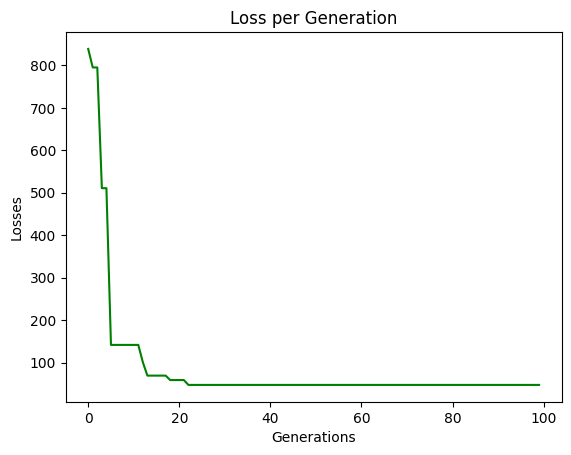

In [183]:
import matplotlib.pyplot as plt

def visualize_loss(losses_list):
      # Plotting the losses over generations
    plt.plot(range(len(losses_list)), losses_list, color='green')
    plt.xlabel("Generations")
    plt.ylabel("Losses")
    plt.title("Loss per Generation")
    plt.show()


losses_list = run_GA()
visualize_loss(losses_list)

[4.096455350413959, -0.09831913336951992, -1.038847814204955, 0.40238723291467937]


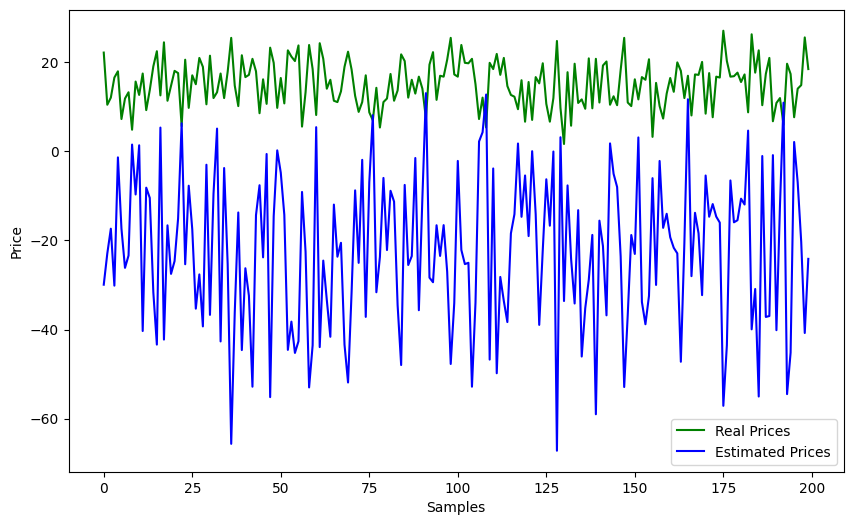

In [184]:
def visualize_predict_gt():
  # visualization of ground truth and predict value
  sorted_population = sorted(population, key=compute_fitness)
  print(sorted_population[-1])
  theta = np.array(sorted_population[-1])

  estimated_prices = np.dot(features_X, theta)

  fig, ax = plt.subplots(figsize=(10, 6))
  plt.xlabel('Samples')
  plt.ylabel('Price')
  plt.plot(sales_Y, c='green', label='Real Prices')
  plt.plot(estimated_prices, c='blue', label='Estimated Prices')
  plt.legend()
  plt.show()

visualize_predict_gt()

[4.096455350413959, -0.09831913336951992, -1.038847814204955, 0.40238723291467937]


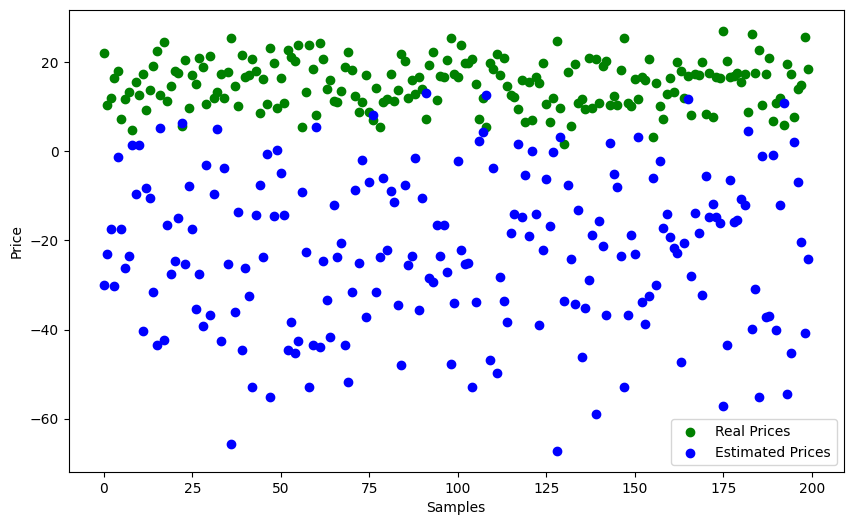

In [185]:
# visualization of ground truth and predict value
sorted_population = sorted(population, key=compute_fitness)
print(sorted_population[-1])
theta = np.array(sorted_population[-1])

estimated_prices = []
samples = [i for i in range(len(features_X))]
for feature in features_X:
    estimated_price = sum(c*x for x, c in zip(feature, theta))
    estimated_prices.append(estimated_price)
fig, ax = plt.subplots(figsize=(10, 6))
# plt.plot(prices, c='green')
# plt.plot(estimated_prices, c='red')
plt.xlabel('Samples')
plt.ylabel('Price')
plt.scatter(samples, sales_Y, c='green', label='Real Prices')
plt.scatter(samples, estimated_prices, c='blue', label='Estimated Prices')
plt.legend()
plt.show()